In [3]:
##Based on this article:
##https://keras.io/examples/timeseries/timeseries_classification_from_scratch/#setup


#import sys
#!{sys.executable} -m pip install tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2022-04-22 08:43:10.819584: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 08:43:10.819634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
import json
# Opening JSON file with labels. 
#the key is a combination of long - lat and the value is either 0 or 1. The labels are created based on data from bleaching DB where % bleaching > 60 % == 1 else 0. 
#The label is taken from the latest sample of that location
#The coordinates is the coordinates found in the sea sureface temperature dataset, and is not always an exact match to the cordinates found in Bleaching DB (the values were rounded to 1 decimal to find matches in both datasets). 
f = open('/home/jovyan/Ocean Data Platform Tutorials/data/NOAA Coral Reef Watch/label_dict2.json',)
target_dict = json.load(f)
f.close()

In [26]:
#target_dict

In [5]:
import glob, os
sequences = list()
targets = list()
sequences2 = list()
targets2 = list()
os.chdir("../test_data")

#Training data: daily sea surface temperature timeseries from 2000-2020 for given locations

for file in glob.glob("*.csv"):
    df = pd.read_csv(file, header=0)
    values = df['0'].fillna(0)
    filename = file.replace("-Copy1","").replace("-Copy2","").replace("-Copy3","").rstrip(".csv")
    print(filename)
    if filename in target_dict:
        #seperated in 2 list, to create a balanced training set
        print (target_dict[name])
        if target_dict[name] == 0:
            sequences2.append(np.array(values).reshape(-1, 1))
            targets2.append(target_dict[name])
        else:
            targets.append(target_dict[name])
            sequences.append(np.array(values).reshape(-1, 1))
            

FileNotFoundError: [Errno 2] No such file or directory: 'test_data'

In [ ]:
len(targets)

In [ ]:
train = [sequences[i] for i in range(0,115)] + [sequences2[i] for i in range(0,115)] #equal amount of 1s and 0s to balance the training set
test = [sequences[i] for i in range(115,len(sequences))]+ [sequences2[i] for i in range(115,len(sequences))]

train_target = [targets[i] for i in range(0, 115)] + [targets2[i] for i in range(0,115)]
test_target = [targets[i] for i in range(115,len(sequences))] + [targets2[i] for i in range(115,len(sequences))]

In [ ]:
x_train = np.array(train)
x_test = np.array(test)
y_train = np.array(train_target)
y_test = np.array(test_target)

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure(figsize=(30,7))
for c in classes:
    c_x_train = x_train[y_train == c]
    for i in range(3):
        plt.plot.scatter(c_x_train[i], label="class " + str(c))
    
ax=plt.gca()
ax.axis([0,7200,22,32])

plt.legend(loc="best")
plt.show()
plt.close()

AttributeError: 'function' object has no attribute 'scatter'

<Figure size 2160x504 with 0 Axes>

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))

In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=10, padding="same")(input_layer)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.BatchNormalization(axis=1, momentum = 0.1)(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=10, padding="same")(conv1)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.BatchNormalization(axis=1, momentum = 0.1)(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=10, padding="same")(conv2)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.BatchNormalization(axis=1, momentum = 0.1)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
epochs = 200
batch_size = 10

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/200
19/19 [==============================] - 17s 858ms/step - loss: 0.8690 - sparse_categorical_accuracy: 0.5870 - val_loss: 0.6297 - val_sparse_categorical_accuracy: 0.6739 - lr: 0.0010
Epoch 2/200
19/19 [==============================] - 16s 850ms/step - loss: 0.6868 - sparse_categorical_accuracy: 0.5598 - val_loss: 0.6475 - val_sparse_categorical_accuracy: 0.6739 - lr: 0.0010
Epoch 3/200
19/19 [==============================] - 16s 839ms/step - loss: 0.6847 - sparse_categorical_accuracy: 0.5815 - val_loss: 0.7096 - val_sparse_categorical_accuracy: 0.4565 - lr: 0.0010
Epoch 4/200
19/19 [==============================] - 16s 845ms/step - loss: 0.6676 - sparse_categorical_accuracy: 0.5707 - val_loss: 0.6303 - val_sparse_categorical_accuracy: 0.6739 - lr: 0.0010
Epoch 5/200
19/19 [==============================] - 16s 843ms/step - loss: 0.6689 - sparse_categorical_accuracy: 0.4946 - val_loss: 0.6203 - val_sparse_categorical_accuracy: 0.6739 - lr: 0.0010
Epoch 6/200
19/19 [======

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 1s 98ms/step - loss: 0.6321 - sparse_categorical_accuracy: 0.6429
Test accuracy 0.6428571343421936
Test loss 0.6321102976799011


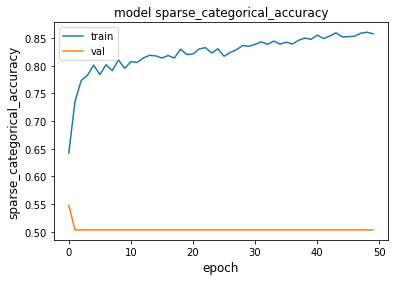

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()